In [121]:
import numpy as np
import glob

In [122]:
import glob
txt_files = glob.glob("../data/dataset-3/simulations/*.fas")
# print('txt_files', txt_files)

char_lookup = {
    '0' : 0,
    '-' : 1,
    'A' : 2,
    'B' : 3,
    'C' : 4,
    'D' : 5,
    'E' : 6,
    'F' : 7,
    'G' : 8,
    'H' : 9,
    'I' : 10,
    'J' : 11,
    'K' : 12,
    'L' : 13,
    'M' : 14,
    'N' : 15,
    'O' : 16,
    'P' : 17,
    'Q' : 18,
    'R' : 19,
    'S' : 20,
    'T' : 21,
    'U' : 22,
    'V' : 23,
    'W' : 24,
    'X' : 25,
    'Y' : 26,
    'Z' : 27,
    'a' : 28,
    'b' : 29,
    'c' : 30,
    'd' : 31
}

print('file count ' + str(len(txt_files)))

# lines is a list of our parsed data that we later turn into a tensor
lines = []

# count of examples parsed
cnt = 1

# currently only taking cells from 15 trees
for filepath in txt_files:
  with open(filepath) as fp:
    line = fp.readline()
    while line:
      # print("Line {}: {}".format(cnt, line.strip()))
      cell_state = line.split()
      encoded = []
      if (len(cell_state) > 1):
        for c in cell_state[-1]:
          if c in char_lookup:
            encoded.append(char_lookup[c] / 31)   
          else:
            encoded.append(.5)    
        lines.append(encoded)
        cnt += 1
      line = fp.readline()
    break
print(cnt)

file count 3000
129


In [123]:
DATA = np.asarray(lines)
DATA.shape

(128, 200)

In [124]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [125]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(DATA)

In [146]:
col_names = ['pca-one', 'pca-two', 'pca-three']
pca_result_df = pd.DataFrame(pca_result,columns=col_names)
pca_result_df['color_4'] = np.repeat([i for i in range(4)],128//4)
pca_result_df['color_8'] = np.repeat([i for i in range(8)],128//8)
pca_result_df['color_16'] = np.repeat([i for i in range(16)],128//16)

pca_result_df['label'] = np.arange(128)
pca_result_df['size'] = np.repeat(100, 128)
# pca_result_df
# pca_result_df[col_names]

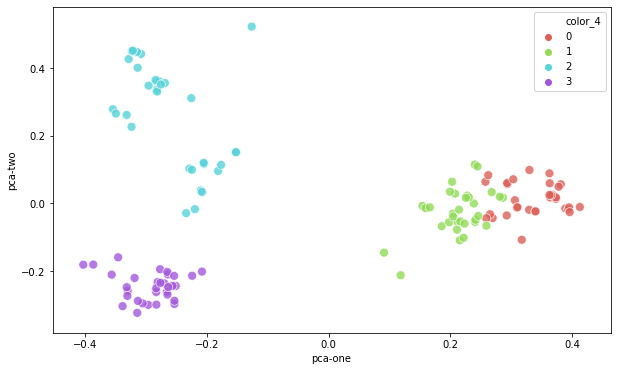

In [137]:
# pca_result.shape
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
#     hue="color_4",
    hue="color_4",
    palette=sns.color_palette("hls", 4),
    data=pca_result_df,
    legend="full",
    s=80,
    alpha=0.8
)

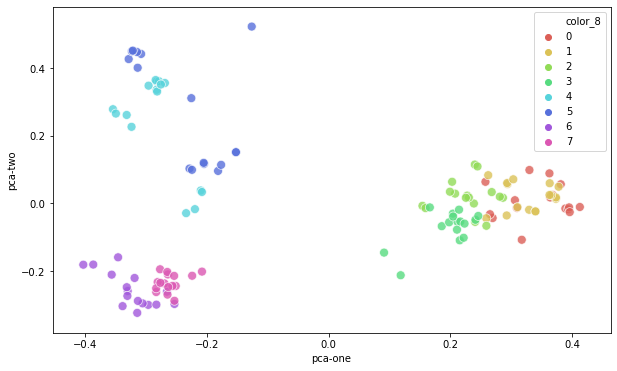

In [136]:
# pca_result.shape
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
#     hue="color_4",
    hue="color_8",
    palette=sns.color_palette("hls", 8),
    data=pca_result_df,
    legend="full",
    s=80,
    alpha=0.8
)

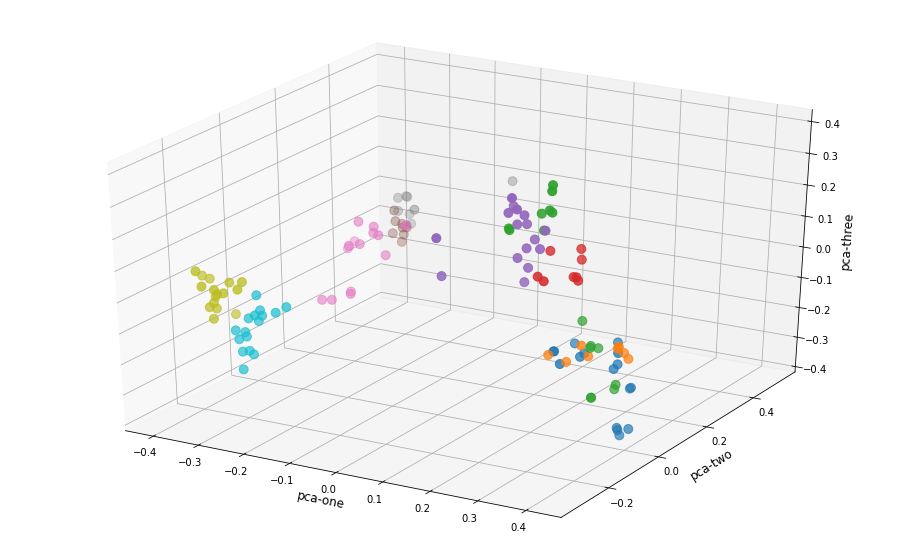

In [150]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result_df.loc[:, "pca-one"], 
    ys=pca_result_df.loc[:, "pca-two"], 
    zs=pca_result_df.loc[:, "pca-three"], 
    c=pca_result_df.loc[:, "color_16"], 
    s=80,
    cmap='tab10'
)
ax.set_xlabel('pca-one', fontsize='large')
ax.set_ylabel('pca-two', fontsize='large')
ax.set_zlabel('pca-three', fontsize='large')
plt.show()

In [129]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(DATA)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 128 samples in 0.000s...
[t-SNE] Computed neighbors for 128 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 128 / 128
[t-SNE] Mean sigma: 0.425958
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.289082
[t-SNE] KL divergence after 300 iterations: 0.511238


In [130]:
col_names = ['tsne-one', 'tsne-two']
tsne_result_df = pd.DataFrame(tsne_results,columns=col_names)
tsne_result_df['color_4'] = np.repeat([i for i in range(4)],128//4)
tsne_result_df['color_8'] = np.repeat([i for i in range(8)],128//8)
tsne_result_df

,tsne-one,tsne-two,color_4,color_8
0,-6.985869,-10.187404,0,0
1,-6.452443,-9.763877,0,0
2,-6.276784,-8.281530,0,0
3,-6.188646,-8.633837,0,0
4,5.768761,-11.896336,0,0
...,...,...,...,...
123,11.362974,0.106010,3,7
124,12.330967,2.418330,3,7
125,11.881940,1.344480,3,7
126,13.399122,1.831633,3,7


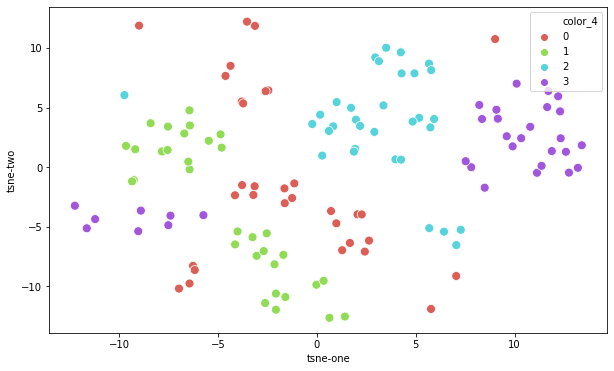

In [143]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="color_4",
    palette=sns.color_palette("hls", 4),
    data=tsne_result_df,
    legend="full",
#     alpha=0.3,
    s=80
)

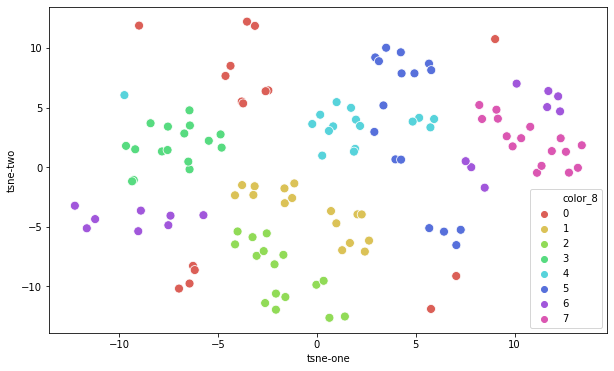

In [144]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="color_8",
    palette=sns.color_palette("hls", 8),
    data=tsne_result_df,
    legend="full",
#     alpha=0.3,
    s=80
)